<a href="https://colab.research.google.com/github/Harihara-sAI/MSMS-Project/blob/main/MSMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import normalize, to_categorical
import os
import cv2
from PIL import Image
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
image_directory = 'drive/MyDrive/Data/Images/'
SIZE = 200
dataset = []
label = []
pet_images = os.listdir(image_directory + 'PET/')
for i, image_name in enumerate(pet_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'PET/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

pehd_images = os.listdir(image_directory + 'PEHD/')
for i, image_name in enumerate(pehd_images):

    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'PEHD/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

pp_images = os.listdir(image_directory + 'PP/')
for i, image_name in enumerate(pp_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'PP/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(2)
dataset = np.array(dataset)
label = np.array(label)

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(SIZE,SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()
epochs=10
history = model.fit(
  X_train,y_train,
  validation_data=(X_test,y_test),
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range,acc, label='Training Accuracy')
plt.plot(epochs_range,val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range,loss, label='Training Loss')
plt.plot(epochs_range,val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

FileNotFoundError: ignored

The label of the image is: PP


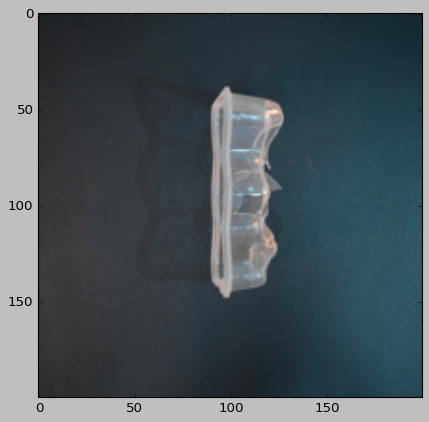

In [ ]:
import random
t=random.randint(0, 2752)
plt.imshow(X_train[t])
if y_train[t]==0:
  print("The label of the image is: PET")
if y_train[t]==1:
  print("The label of the image is: HDPE")
if y_train[t]==2:
  print("The label of the image is: PP")

1/1 [==============================] - 0s 131ms/step
The label of the image is: PET


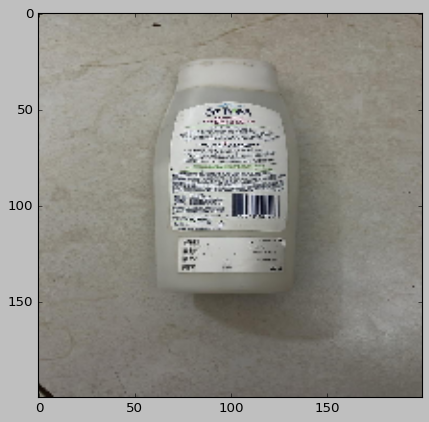

In [ ]:
from keras.preprocessing import image
img = image.load_img('shampoo.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,200,200,3))
predicted_class = np.argmax(proba, axis=None)
plt.imshow(img)
if predicted_class==0:
  print("The label of the image is: PET")
if predicted_class==1:
  print("The label of the image is: HDPE")
if predicted_class==2:
  print("The label of the image is: PP")

1/1 [==============================] - 0s 35ms/step
The label of the image is: PET


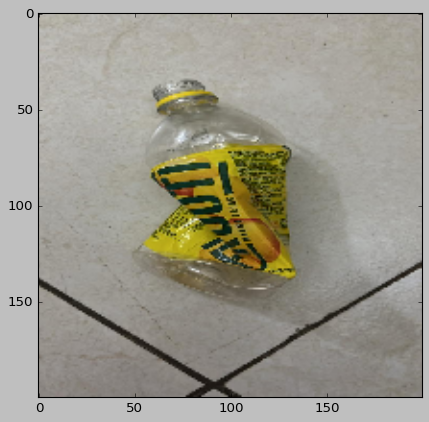

In [ ]:
from keras.preprocessing import image
img = image.load_img('frooti.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,200,200,3))
predicted_class = np.argmax(proba, axis=None)
plt.imshow(img)
if predicted_class==0:
  print("The label of the image is: PET")
if predicted_class==1:
  print("The label of the image is: HDPE")
if predicted_class==2:
  print("The label of the image is: PP")